In [1]:
import json
import time, datetime
import bisect
import time
import datetime

MILS_TO_S = 1e3

In [6]:


def read_data(file):
    data = []
    with open(file, 'r') as f:
        print (1)
        data = list(map(json.loads, f.readlines()))
        #data.append(json.loads(f.readline()))
        f.close()
    return data

#file= "Log_raw/Android_log.txt"
#d = read_data(file)

In [2]:
def check_need_sort(data):
    last = 0
    for i in data[1:]:
        if last > i['date']:
            print(i, last)
            return 1
        last = i['date']
        
        
#if check_need_sort(d):
#    d.sort(key=lambda x: x['date'])


In [18]:
time_int_to_str(d[0]['date']), time_int_to_str(1360033676.559), time_int_to_str(1379033676.559)

(datetime.datetime(2018, 5, 18, 14, 11, 19),
 datetime.datetime(2013, 2, 5, 7, 7, 56, 559000),
 datetime.datetime(2013, 9, 13, 4, 54, 36, 559000))

In [4]:
import json


file = ""
data = []

    
def get_time_key(data):
    return [x['date'] for x in data]

def take_period(data, start="2000-01-21 16:20:20", end="2013-09-21 16:20:20"): 
    #data sorted and reversed location old->new, with keys = [timestampMs, ]
    keys = get_time_key(data)
    start = time_str_to_int(start) 
    end = time_str_to_int(end)
    i_start, i_end = bisect.bisect_left(keys, start), bisect.bisect_right(keys, end)
    print(i_start, i_end, end)
    return data[i_start:i_end]
    
def time_str_to_int(t):
    # return seconds
    if ":" in t:
        d = datetime.datetime.strptime(t, "%Y-%m-%d %H:%M:%S").timestamp()
    else:
        d = datetime.datetime.strptime(t, "%Y-%m-%d").timestamp()
    return d #* MILS_TO_S
        
def time_int_to_str(t):
    #t seconds
    return datetime.datetime.fromtimestamp(t)

In [25]:


d2 = take_period(d, start="2016-03-20 16:20:20", end="2016-08-20 16:20:20")
for i in d2:
    print(time_int_to_str(i['date']), i['body']['app'])

48 48 1471699220.0


In [23]:

def merge_datasets(files=[], 
                   start_date="2013-02-09 16:20:20", 
                   end_date="2013-09-20 16:20:20"):
    merged_set = [] 
    for f in files:
        data = read_data(f)
        if check_need_sort(data):
            data.sort(key=lambda x: x['date'])
        period = take_period(data, start_date, end_date)
        
        merged_set.extend(period)
    merged_set.sort(key=lambda x: x['date'])
    return merged_set

all_files = ["Log_raw/Android_log.txt", "Log_raw/vk_log.txt", "Log_raw/GLH_log.txt", "Log_raw/GSearch_log.txt"]
mergd = merge_datasets(all_files)

1
{'user_id': 'my', 'date': 1938442408.0, 'body': {'app': 'SMS/MMS', 'applink': 'https://play.google.com/store/apps/details?id=com.android.mms'}, 'source': 'Android'} 1938442589.0
0 0 1379679620.0
1
{'user_id': '161389333', 'date': 1527952627, 'body': "{'from': 161389333, 'text': 'нет. у меня на странице написано куда писать по таким вопросам. защел случайно', 'to': 'итр134566995'}", 'source': 'vk'} 1527952683
2352 4095 1379679620.0
1
0 21210 1379679620.0
1
{'user_id': 'my', 'date': 1526637170.0, 'body': {'text': 'profi.ru', 'url': '=profi.ru', 'type': 'h'}, 'source': 'GSearch'} 1526637176.0
0 0 1379679620.0


In [38]:
mergd[5500:6000]

[{'body': {'action_type': 'stable_',
   'distant': 0.0,
   'duration': 60.01600003242493,
   'finish_loc': None,
   'n_points': 1,
   'start_loc': [556920467, 375339980],
   'start_time': 1367406127.898},
  'date': 1367406127.898,
  'source': 'GLH',
  'user_id': 'my'},
 {'body': {'action_type': 'transport',
   'distant': 1.3334158147348405,
   'duration': 180.7170000076294,
   'finish_loc': [556973197, 375409667],
   'n_points': 2,
   'start_loc': [556920467, 375339980],
   'start_time': 1367406187.914},
  'date': 1367406187.914,
  'source': 'GLH',
  'user_id': 'my'},
 {'body': {'action_type': 'walk_run_b',
   'distant': 0.5871512775921848,
   'duration': 181.24000000953674,
   'finish_loc': None,
   'n_points': 1,
   'start_loc': [556920290, 375389057],
   'start_time': 1367406368.631},
  'date': 1367406368.631,
  'source': 'GLH',
  'user_id': 'my'},
 {'body': {'action_type': 'stable_',
   'distant': 0.0,
   'duration': 358.99000000953674,
   'finish_loc': [556883760, 375456701],
   '

In [34]:
import collections
for ass in mergd[:100]:
    print(ass['source'], time_int_to_str(ass['date']), end=',')

vk 2013-02-10 12:30:32,vk 2013-02-13 13:49:40,vk 2013-02-13 16:56:44,vk 2013-02-13 20:47:52,vk 2013-02-14 12:35:24,vk 2013-02-14 13:58:44,vk 2013-02-14 14:00:56,vk 2013-02-14 14:02:24,vk 2013-02-14 14:02:56,vk 2013-02-14 19:40:04,vk 2013-02-14 20:48:47,vk 2013-02-14 20:49:00,vk 2013-02-14 21:28:00,vk 2013-02-14 21:28:52,vk 2013-02-14 21:30:50,vk 2013-02-14 22:38:28,vk 2013-02-14 22:43:08,vk 2013-02-14 22:43:08,vk 2013-02-14 22:44:20,vk 2013-02-14 22:44:20,vk 2013-02-14 22:44:32,vk 2013-02-14 22:44:32,vk 2013-02-14 22:44:40,vk 2013-02-14 22:44:40,vk 2013-02-14 23:12:08,vk 2013-02-15 00:52:44,vk 2013-02-16 10:41:24,vk 2013-02-16 10:42:08,vk 2013-02-16 10:43:48,vk 2013-02-16 10:44:20,vk 2013-02-16 10:56:44,vk 2013-02-16 11:50:32,vk 2013-02-16 11:51:44,vk 2013-02-16 11:52:40,vk 2013-02-16 11:59:04,vk 2013-02-16 12:11:20,vk 2013-02-16 12:20:28,vk 2013-02-16 12:31:40,vk 2013-02-16 14:59:40,vk 2013-02-18 18:48:20,vk 2013-02-20 19:30:28,vk 2013-02-21 16:30:08,vk 2013-02-21 17:31:12,vk 2013-02-

In [29]:
import requests
import vk_api

with open("/home/denis/sensitive_data.py", "r") as f:
        VK = json.loads(f.read())['VK']
        f.close()

    #vk_arch = VkArchive(VK["log"], VK["pass"])
vk_session = vk_api.VkApi(VK["log"], VK["pass"])
try:
    vk_session.auth()
except vk_api.AuthError as error_msg:
    print(error_msg)
vk = vk_session.get_api()


[{'first_name': 'Михаил', 'id': 26903398, 'last_name': 'Стриж'}]

In [36]:
vk.users.get(user_ids=97256560)

[{'first_name': 'Регина',
  'id': 97256560,
  'last_name': 'Филоненко(габдуллина)'}]

In [ ]:
191634030

# Show our data

In [7]:
import matplotlib.pyplot as plt
#all_files = ["Log_raw/Android_log.txt", "Log_raw/vk_log.txt", "Log_raw/GLH_log.txt", "Log_raw/GSearch_log.txt"]
#d = read_data(all_files[0])

In [8]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def plt_hist(data):
    x = get_time_key(data)
    plt.hist(x, 200, facecolor='green')
    plt.show()

In [11]:
import plotly
import plotly.plotly as py
import pylab as plt


1
1
1


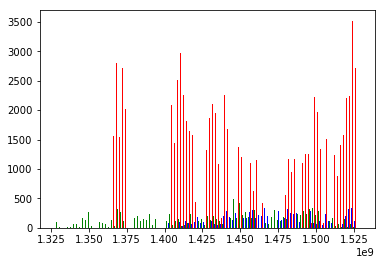

In [14]:
dates = []
labes = []
c = ["green", "red", "blue"]#, "yellow"]
fig = plt.figure()
for i, f in enumerate(all_files[1:]):
    d = read_data(f)
    dates.append(get_time_key(d))
    labes.append(f.split("/")[0][:-7])
plt.hist(dates, 200, label=labes, color=c)
#plt.axis([1.3 * 1e9, 1.55 * 1e9, 10, 20])
#plot_url = py.plot_mpl(fig, filename='mpl-histogram')
plt.show()

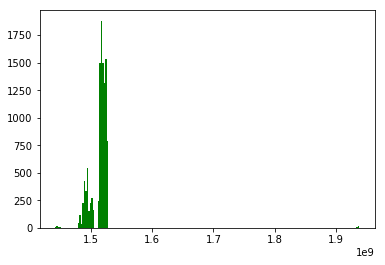

In [52]:
#"andr"
d = read_data(all_files[0])
plt_hist(d)

1


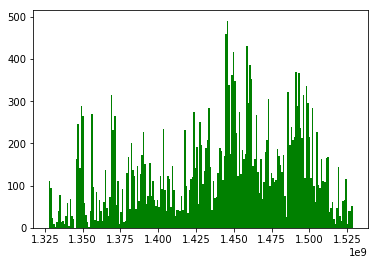

In [57]:
#"vk"
d = read_data(all_files[1])
plt_hist(d)

1


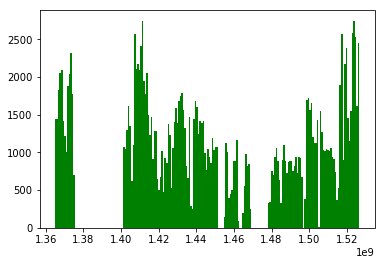

In [54]:
#"LocHist"
d = read_data(all_files[2])
plt_hist(d)

1


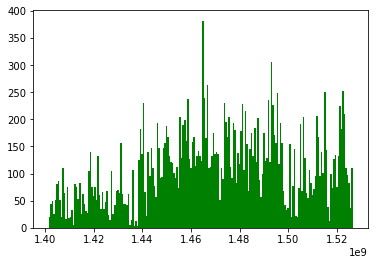

In [53]:
#"search"
d = read_data(all_files[3])
plt_hist(d)